In [1]:
!nvidia-smi

Thu Nov  9 07:53:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
## Connecting to the google drive

#from google.colab import drive
#drive.mount('contents/drive')

In [3]:
!pwd

/content


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
X = pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
## InDependent Feature values
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y = data.target

In [10]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
X.shape, y.shape

((20640, 8), (20640,))

<Axes: >

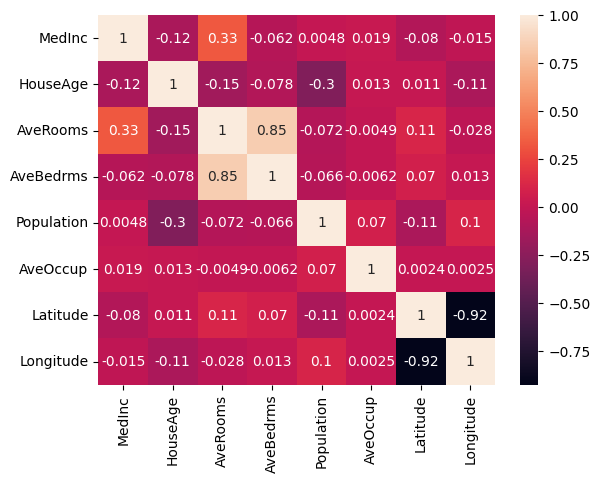

In [12]:
sns.heatmap(X.corr(),annot=True)

In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=.3,random_state=42)

In [14]:
X_train_full.shape, X_test.shape

((14448, 8), (6192, 8))

In [15]:
y_train_full.shape, y_test.shape

((14448,), (6192,))

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=.2,random_state=42)

In [17]:
X_train.shape, X_valid.shape

((11558, 8), (2890, 8))

In [18]:
y_train.shape,y_valid.shape

((11558,), (2890,))

In [19]:
X_train.shape[1:]

(8,)

In [20]:
## Layer creation
layers = [
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu", name="Hiddenlayer1"),
    tf.keras.layers.Dense(5,activation="relu", name = "Hiddenlayer2"),
    tf.keras.layers.Dense(1,activation="sigmoid",name = "Outputlayer")
]

In [21]:
model = tf.keras.models.Sequential(layers)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 Hiddenlayer1 (Dense)        (None, 10)                310       
                                                                 
 Hiddenlayer2 (Dense)        (None, 5)                 55        
                                                                 
 Outputlayer (Dense)         (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
## For calculating the accuracy score -r2_score
## for that from keras import backend as be

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )



In [30]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [31]:
EPOCHS = 10
history = model.fit(X_train, y_train, epochs = EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/10
362/362 [==============================] - 7s 4ms/step - loss: 5.6143 - coeff_determination: -3.5638 - val_loss: 5.6499 - val_coeff_determination: -3.3524
Epoch 2/10
362/362 [==============================] - 2s 4ms/step - loss: 5.6143 - coeff_determination: -3.5084 - val_loss: 5.6499 - val_coeff_determination: -3.3524
Epoch 3/10
362/362 [==============================] - 1s 4ms/step - loss: 5.6143 - coeff_determination: -3.5396 - val_loss: 5.6499 - val_coeff_determination: -3.3524
Epoch 4/10
362/362 [==============================] - 1s 4ms/step - loss: 5.6143 - coeff_determination: -3.5139 - val_loss: 5.6499 - val_coeff_determination: -3.3524
Epoch 5/10
362/362 [==============================] - 2s 6ms/step - loss: 5.6143 - coeff_determination: -3.5386 - val_loss: 5.6499 - val_coeff_determination: -3.3524
Epoch 6/10
362/362 [==============================] - 1s 4ms/step - loss: 5.6143 - coeff_determination: -3.4838 - val_loss: 5.6499 - val_coeff_determination: -3.3524
Epoc

In [32]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,5.614330,-3.563833,5.649895,-3.352416
1,5.614331,-3.508443,5.649895,-3.352416
2,5.614331,-3.539638,5.649895,-3.352415
3,5.614328,-3.513927,5.649895,-3.352415
4,5.614332,-3.538624,5.649895,-3.352415
5,5.614328,-3.483787,5.649894,-3.352415
6,5.614327,-3.527807,5.649893,-3.352415
7,5.614327,-3.512657,5.649892,-3.352415
8,5.614329,-3.518609,5.649892,-3.352414
9,5.614326,-3.516166,5.649891,-3.352414


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['coeff_determination'].plot(kind='hist', bins=20, title='coeff_determination')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_coeff_determination'].plot(kind='hist', bins=20, title='val_coeff_determination')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='loss', y='coeff_determination', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='coeff_determination', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='val_loss', y='val_coeff_determination', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['val_coeff_determination']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('val_coeff_determination', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('val_coeff_determination')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['val_coeff_determination']
  ys = series['coeff_determination']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('val_coeff_determination', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('val_coeff_determination')
_ = plt.ylabel('coeff_determination')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['val_coeff_determination']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('val_coeff_determination', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('val_coeff_determination')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['val_coeff_determination']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'val_coeff_determination'}, axis=1)
              .sort_values('val_coeff_determination', ascending=True))
  xs = counted['val_coeff_determination']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('val_coeff_determination', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('val_coeff_determination')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['coeff_determination'].plot(kind='line', figsize=(8, 4), title='coeff_determination')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['val_coeff_determination'].plot(kind='line', figsize=(8, 4), title='val_coeff_determination')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

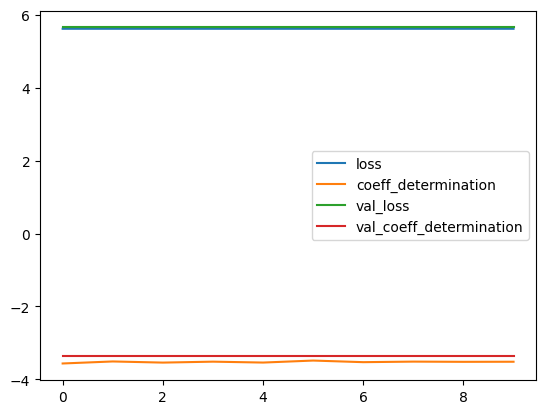

In [33]:
pd.DataFrame(history.history).plot()

In [34]:
model.evaluate(X_test, y_test)

194/194 [==============================] - 1s 3ms/step - loss: 5.5849 - coeff_determination: -3.5783


[5.584890842437744, -3.578272819519043]

In [35]:
X_test.shape

(6192, 8)

In [46]:
 new = np.array(X_test.loc[0:0])


In [47]:
new

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [48]:
new.shape

(1, 8)

In [49]:
model.predict(new)

1/1 [==============================] - 0s 79ms/step


array([[2.181495e-11]], dtype=float32)